# Lab 1 - Ensemble Learning

Simple first implementations of ensemble learning methods with some data preprocessing and EDA.

## Data Preprocessing

1. Loading data and basic summary
2. EDA
3. Preprocessing

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Load and Inspect Dataset

In [2]:
# importing data and creating data frame
house_data = pd.read_csv("C:/Users/Joseph Kennedy/Documents/4th Year Data Science/Advanced Machine Learning/Labs/Lab 1/Datasets/archive/housing.csv")

In [3]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Note the missing total bedroooms. Decide on imputation or removal
# Probably removal to avoid noise, but potential for averaging nearby house values, for example
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 1.2 EDA

In [6]:
numerical_data = house_data.select_dtypes(include="number")
columns = house_data.columns
numerical_cols = numerical_data.columns
columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

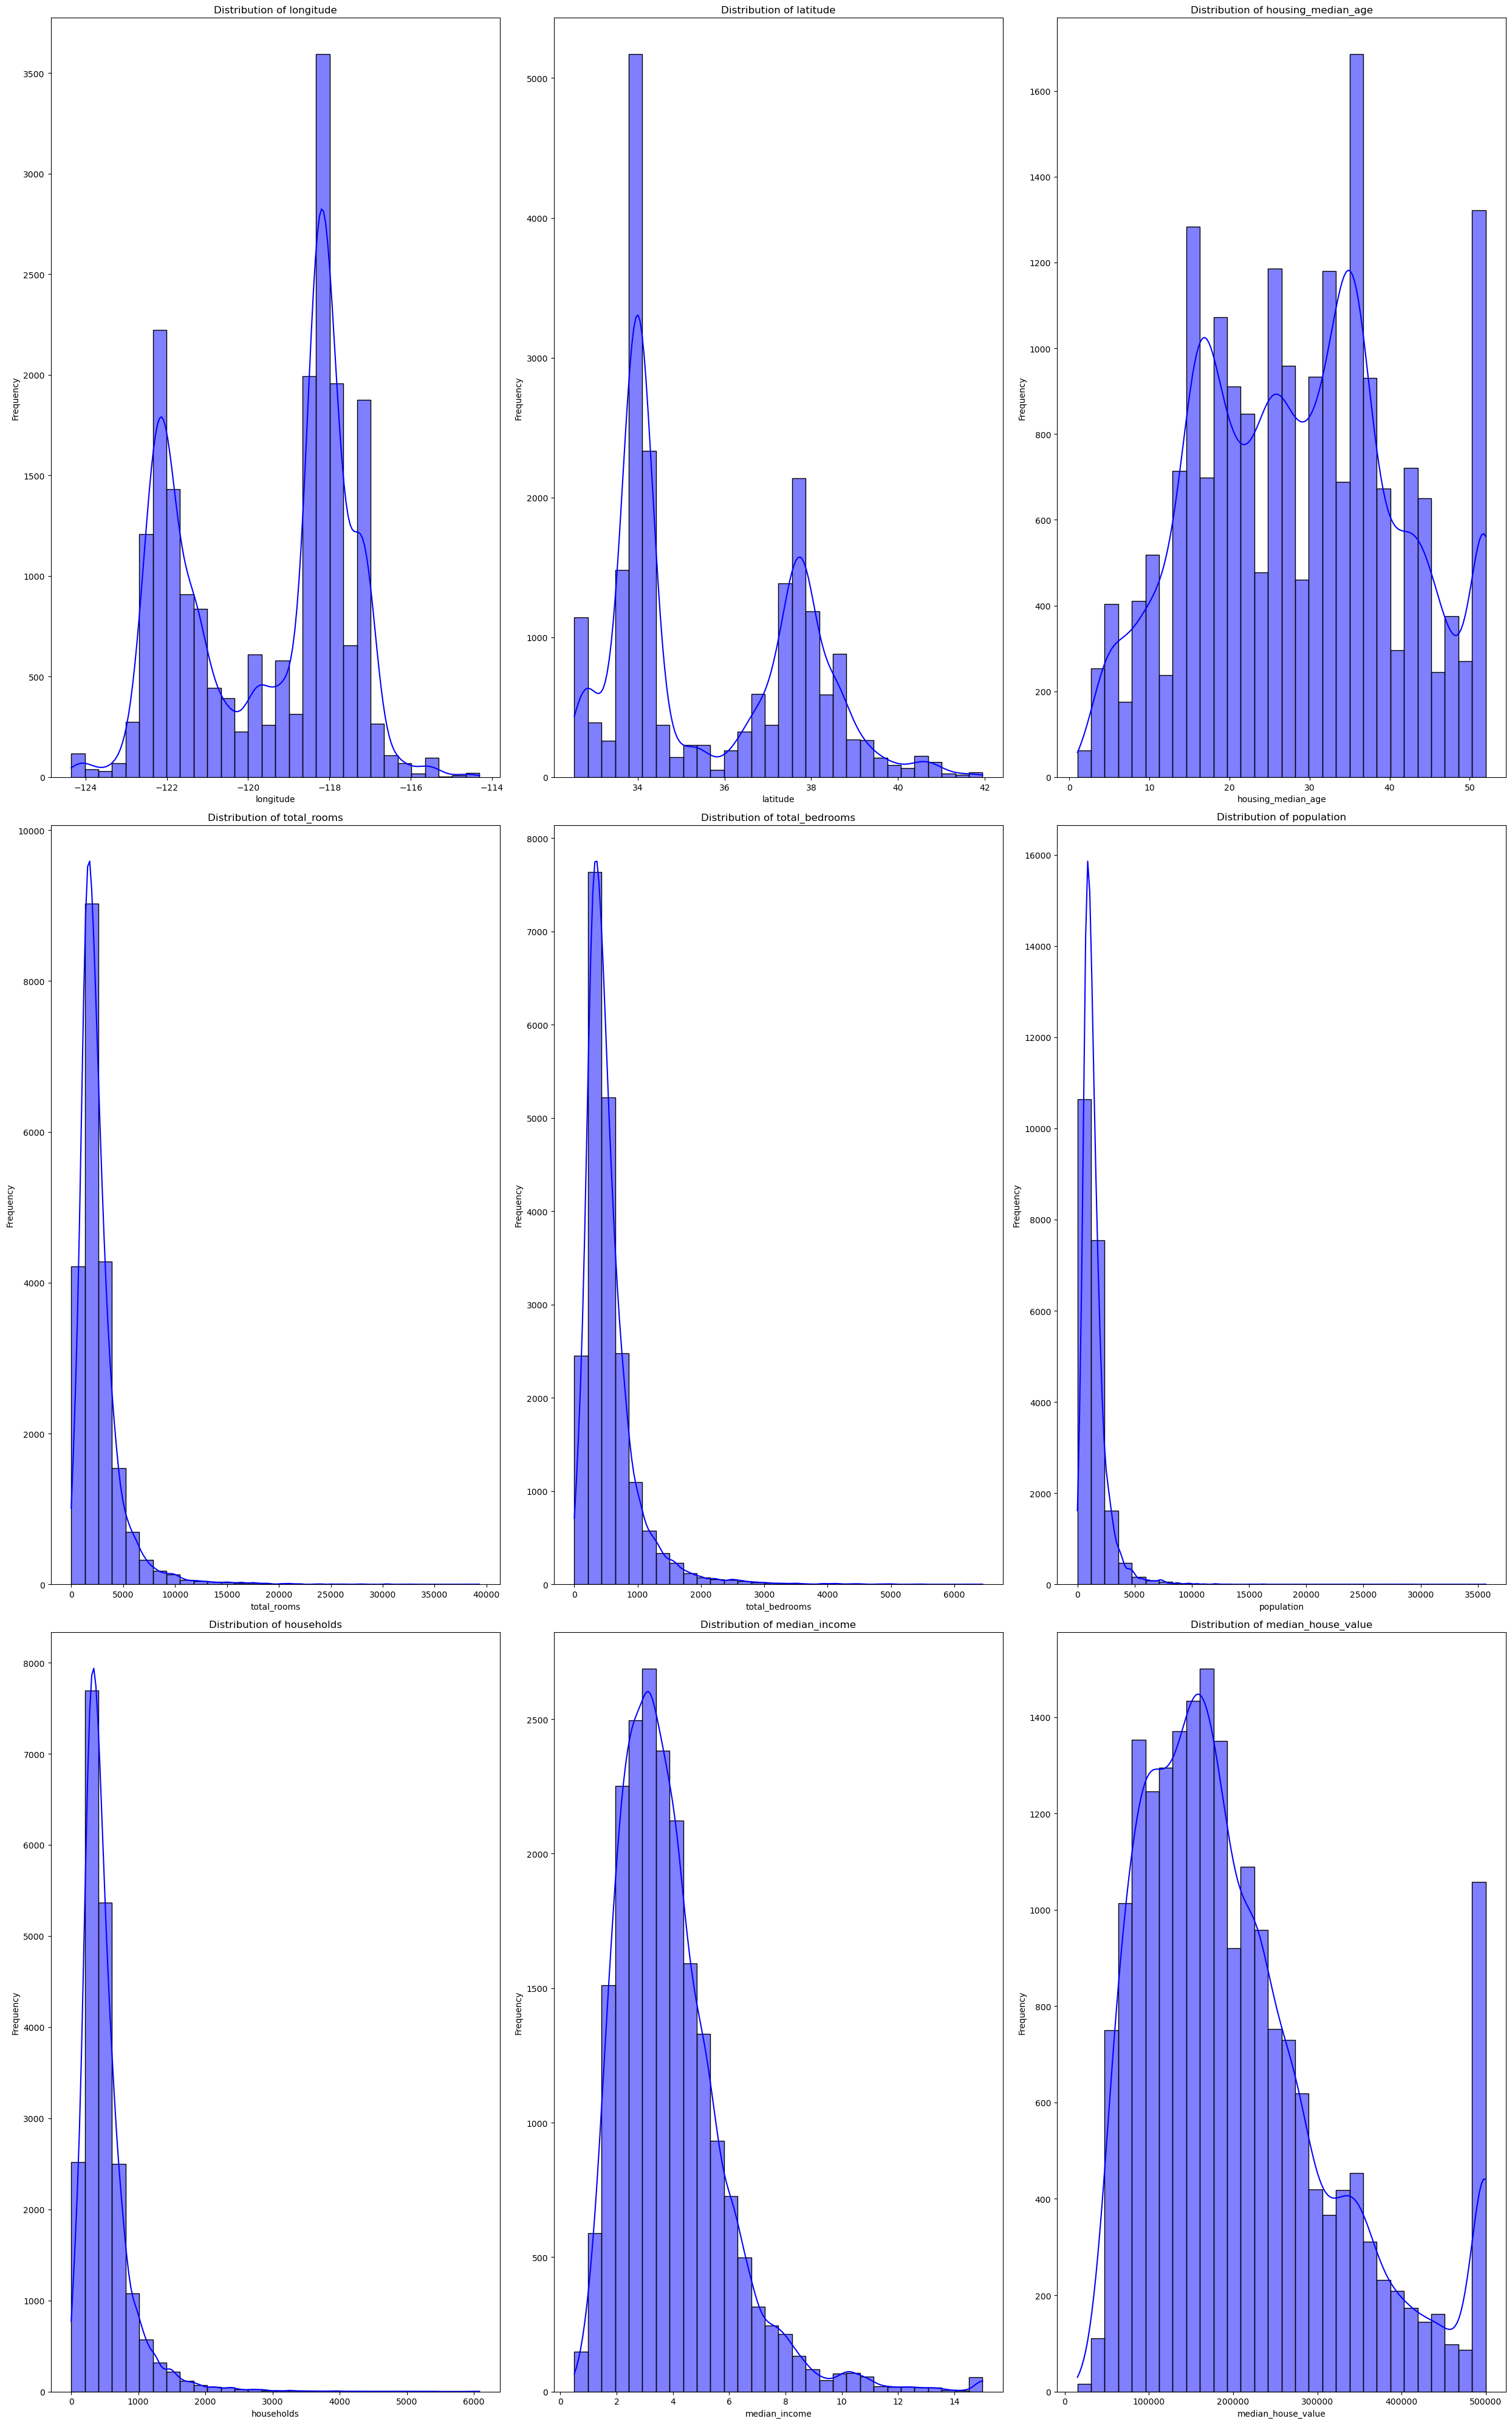

In [7]:
# set size of figure
plt.figure(figsize=(25, len(columns)*4))

for i, column in enumerate(numerical_data.columns):
    plt.subplot(3, 3, i + 1)    # adds each subplot with size dimensions (3 rows, 3 columns) for 9 features
    sns.histplot(numerical_data[column], kde=True, bins=30, color='blue')    # histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Joseph Kennedy\AppData\Local\Temp\ipykernel_11844\1079366503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house_data, x='ocean_proximity', palette='viridis')


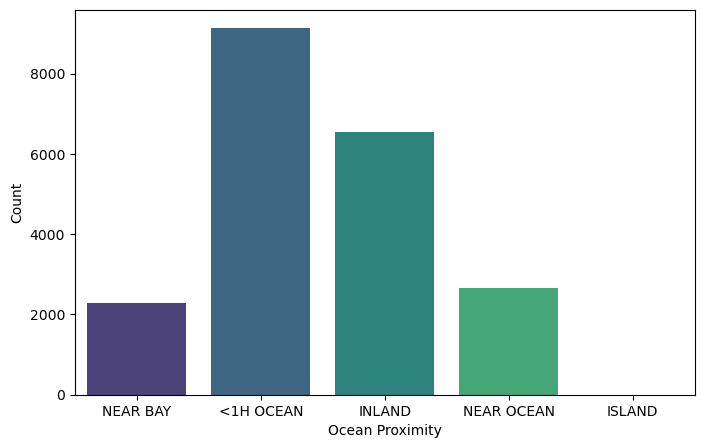

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=house_data, x='ocean_proximity', palette='viridis')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")

plt.show()           

In [9]:
house_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: >

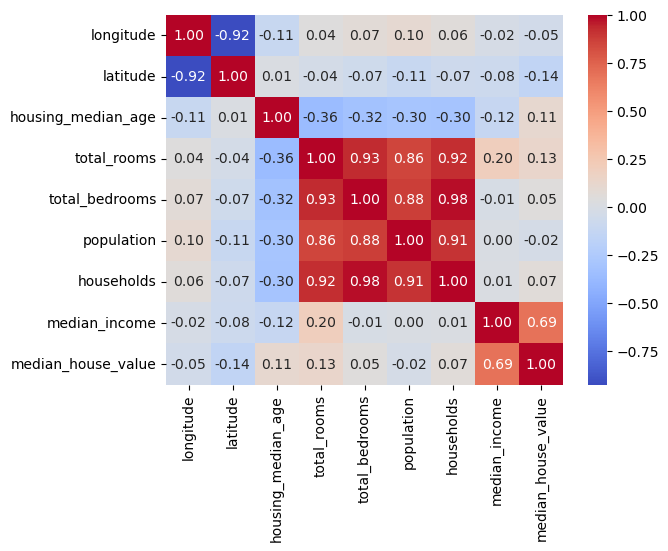

In [10]:
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

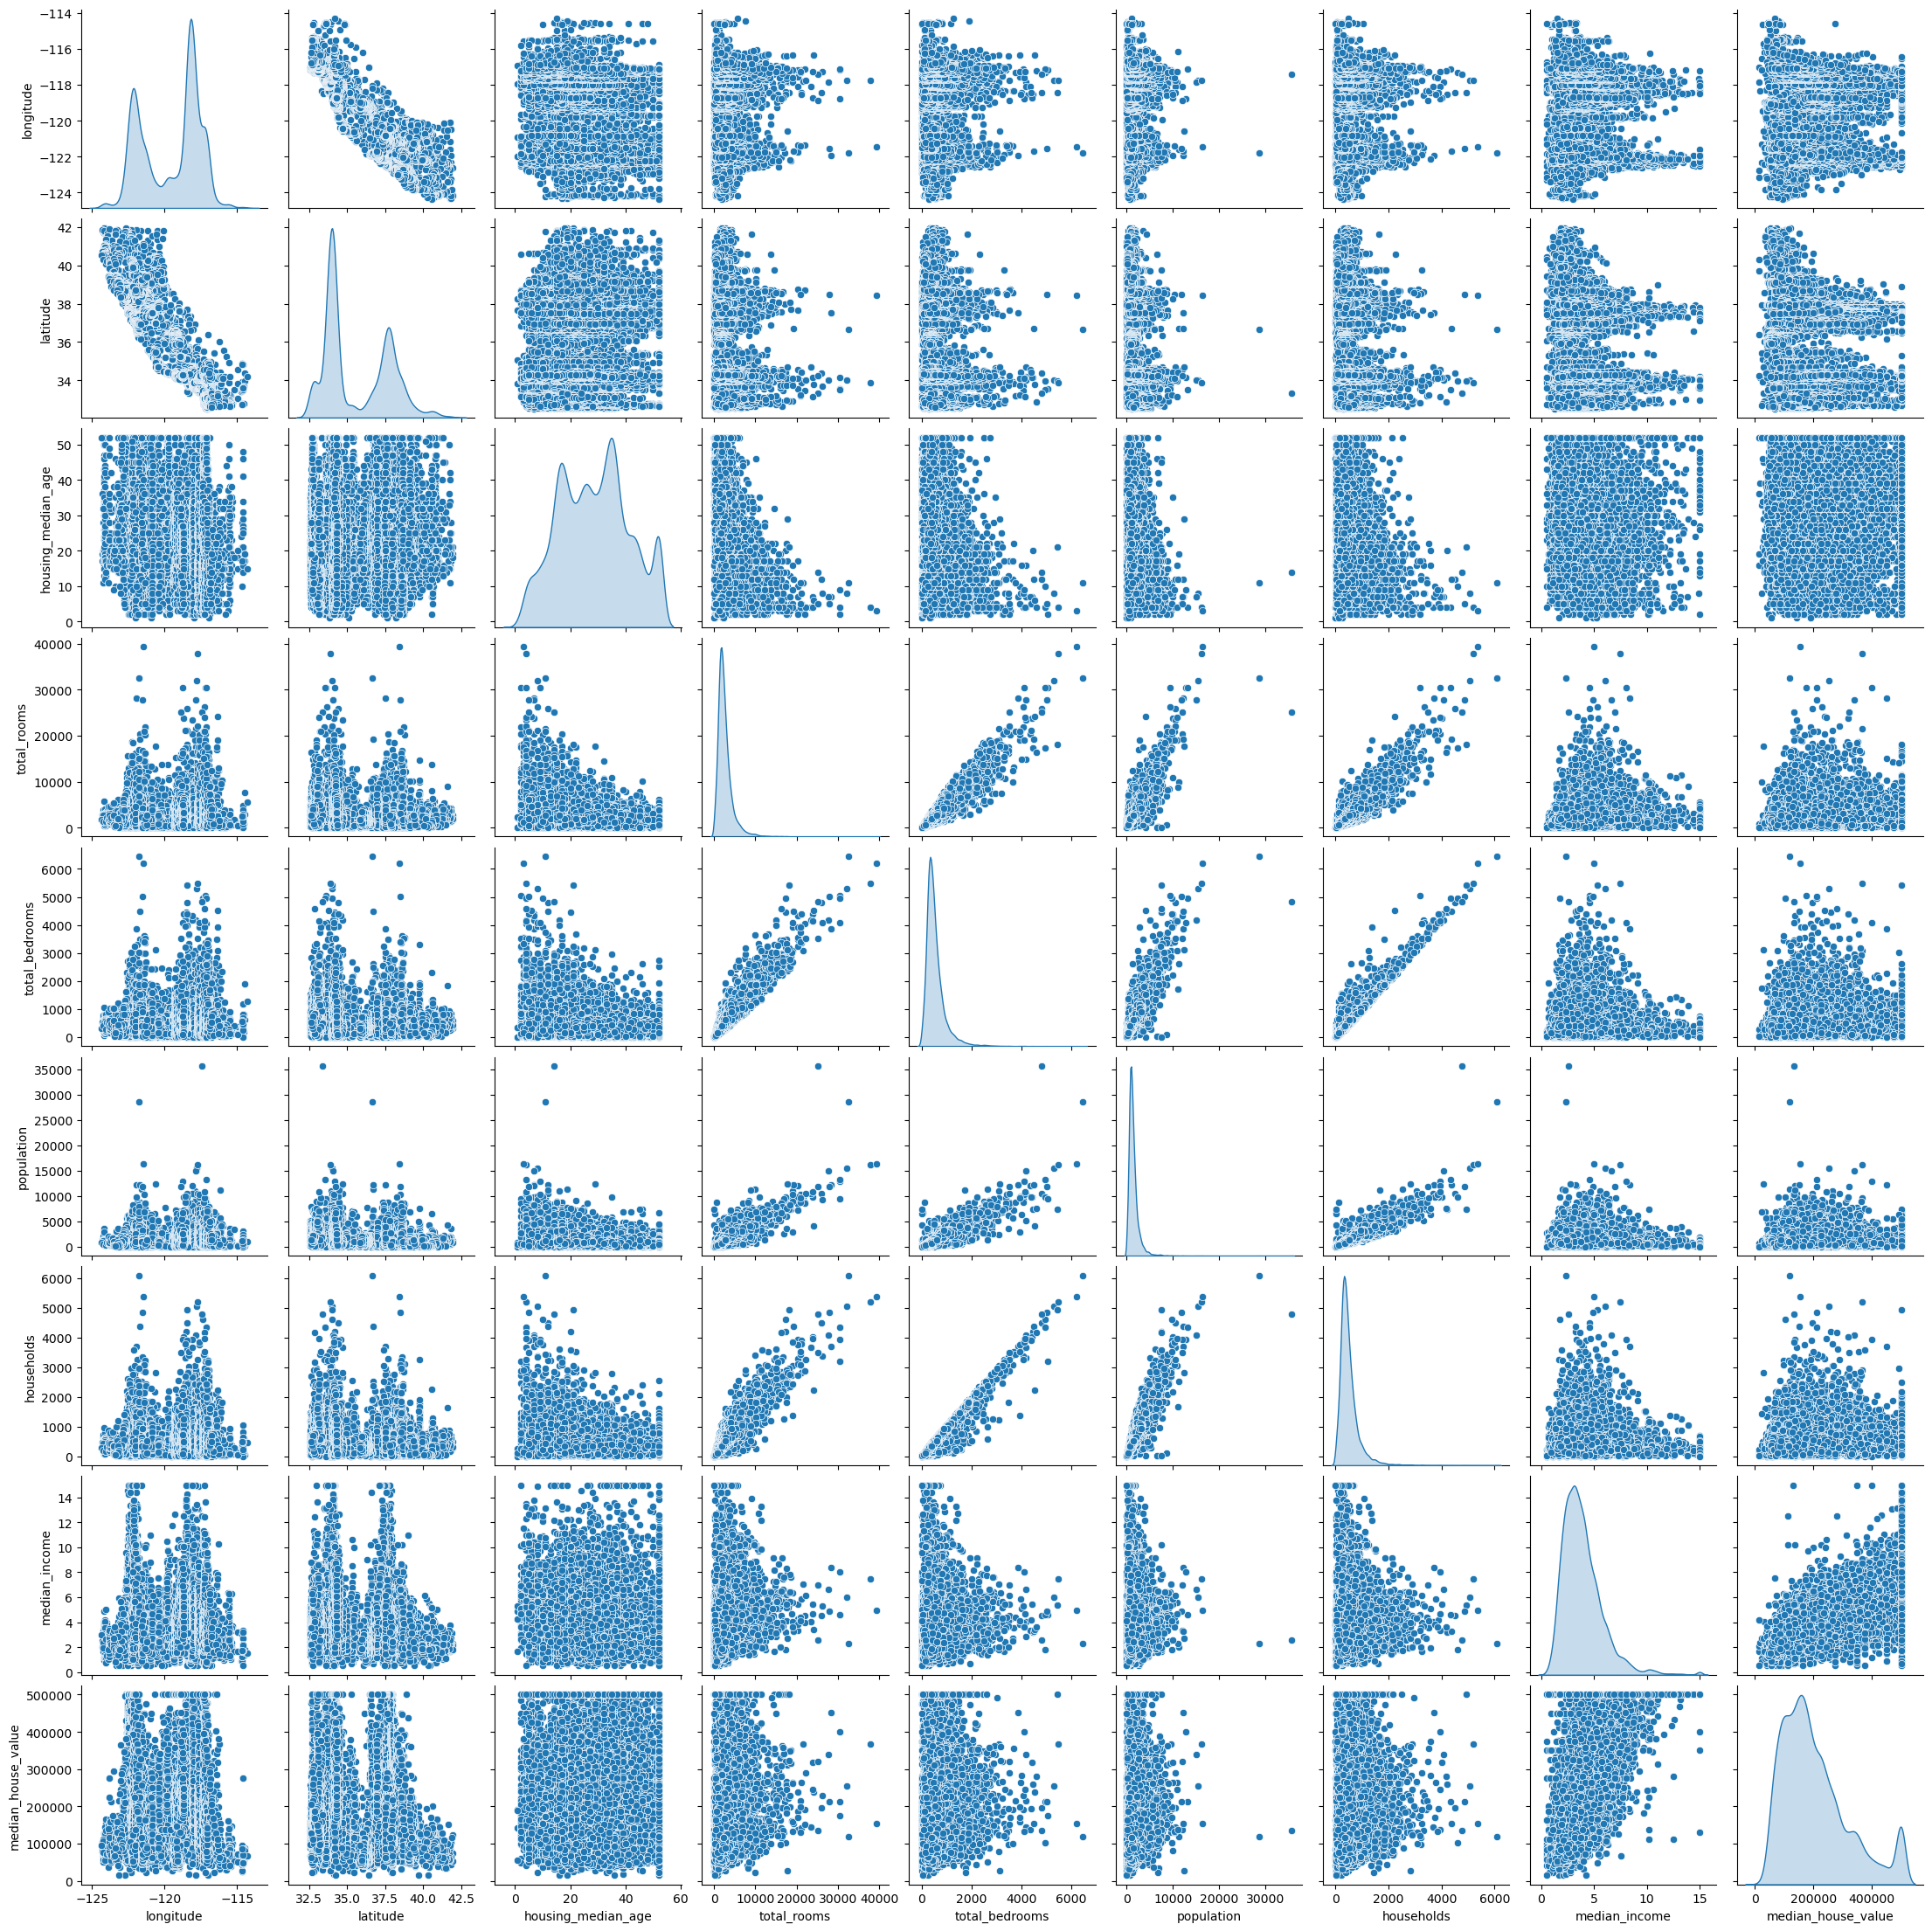

In [11]:
sns.pairplot(house_data, diag_kind='kde')

It appears that there are some significant correlations here, including a strong negative correlation between longitude and latitude as well as a fairly strong positive correlation between median income and median house value, which is particularly important since this shows median income as a good estimator of their house value over a population.

Longitude and latitude is probably not so important since it's purely geographical, but median income and house value being strongly correlated is both valuable and makes intuitive sense. There are many other intuitively reasonable strong correlations such as number of bedrooms and total rooms which are not as instantly valuable as the median income/median house value pair, but is still potentially worth exploring further. 

## 1.3 Preprocessing

Here, we want to handle all missing values, scale the features and split the dataset into training and testing data.

In [12]:
from sklearn.impute import SimpleImputer

# takes mean of all other total bedrooms and imputes them. 
# could look into KNN Imputation for neighbourhood averages rather than global

imputer = SimpleImputer(strategy='mean')
house_data['total_bedrooms'] = imputer.fit_transform(house_data[['total_bedrooms']])

In [13]:
# no longer any null values
house_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
# using one-hot encoding for ocean_proximity
ocean_dummies = pd.get_dummies(house_data['ocean_proximity'], prefix='ocean_proximity').astype(int)

In [15]:
# drop the original categorical columns
house_data.drop('ocean_proximity', axis=1, inplace=True)

In [16]:
# double checking ocean_proximity dropped and other columns selected for scaling
# not scaling the one-hot columns as they are already a 0-1 scale. 
print(house_data.head())
numerical_cols

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [17]:
# scale all numerical features to have values between 0 and 1
# this prevents potentially heavier weighting towards features with higher ranges, particularly for models that depend on feature magnitude 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
house_data[numerical_cols] = scaler.fit_transform(house_data[numerical_cols])

In [18]:
# merge the dummies into the original df
house_data = pd.concat([house_data, ocean_dummies], axis=1)

In [19]:
print(house_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  \
0    0.008941    0.020556       0.539668            0.902266   
1    0.067210    0.186976       0.538027            0.708247   
2    0.013818    0.028943       0.466028            0.695051   
3    0.015555    0.035849       0.354699            0.672783   
4    0.015752    0.042427       0.230776            0.674638   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

In [20]:
# performs a standard 80/20 training/testing split using sklearn instead of slicing manually
from sklearn.model_selection import train_test_split

X = house_data.drop(columns=['median_house_value'])
y = house_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

## 2.1 Model Implementation

Perform ensemble methods:

- Bagging
- Random Forest
- AdaBoost
- Gradient Boosting

In [23]:
# import necessary sklearn methods
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [26]:
# create the bagging model
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(), 
    n_estimators=50,
    oob_score=True, # allows us to obtain and analyse out-of-bag
    random_state=42)

# fit model to training data
bagging_model.fit(X_train, y_train)

# test the model
y_pred_bagging = bagging_model.predict(X_test)

# calculate MSE and R2 and obtain OOB
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
oob_bagging = bagging_model.oob_score_

Bagging Model - MSE: 0.0103, R-Squared0.8170, OOB Score: 0.8131


In [27]:
print(f'Bagging Model - MSE: {mse_bagging:.4f}, R-Squared {r2_bagging:.4F}, OOB Score: {oob_bagging:.4f}')

Bagging Model - MSE: 0.0103, R-Squared 0.8170, OOB Score: 0.8131


In [29]:
# create random forest model (note that, by default, random forest takes all features to be sampled randomly (max_features='auto'))
rf_model = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=42)

# train the model
rf_model.fit(X_train, y_train)

# test this model
y_pred_rf = rf_model.predict(X_test)

# calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
oob_rf = rf_model.oob_score_

In [30]:
print(f'Random Forest Model - MSE: {mse_rf:.4f}, R-Squared {r2_rf:.4F}, OOB Score: {oob_rf:.4f}')

Random Forest Model - MSE: 0.0102, R-Squared 0.8197, OOB Score: 0.8195


In [31]:
# create AdaBoost model (all parameters are default)
adaboost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42)

# training and testing model
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# calculate metrics
mse_ada = mean_squared_error(y_test, y_pred_adaboost)
r2_ada = r2_score(y_test, y_pred_adaboost)

In [32]:
print(f'AdaBoost Model - MSE: {mse_ada:.4f}, R-Squared: {r2_ada:.4f}')

AdaBoost Model - MSE: 0.0104, R-Squared: 0.8166


In [33]:
# repeat for Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [34]:
print(f'Gradient Boosting Model - MSE: {mse_gb:.4f}, R-Squared: {r2_gb:.4f}')

Gradient Boosting Model - MSE: 0.0129, R-Squared: 0.7711


## 3. Model Evaluation and Selection

## 3.1 Cross Validation

Here, the idea is to gain a better idea of the optimal hyperparameters through some tuning, using Grid Search. I will search for the best learning rate, number of weak learners and max. depth of the tree on the gradient boost model.

In [36]:
# hypertuning for gradient boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# best parameteres and score
grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200},
 0.8279909894430036)

We see above that there is an improvement form ~77% to ~83% just from this, which can obviously be refined further. Now, for the other 3 models:

In [41]:
from sklearn.model_selection import learning_curve, cross_val_score

# similar to the above, list hyperparameters in a grid, but this time, for all models
models_and_params = [
    {
        "name": "Bagging",
        "model": BaggingRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [10, 50, 100],
            "max_samples": [0.5, 0.7, 1.0],
            "estimator": [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)]
        }
    },
    {
        "name": "Random Forest",
        "model": RandomForestRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]  # note, default for this is 2 as you cannot split smaller than this
        }
    },
    {
        "name": "AdaBoost",
        "model": AdaBoostRegressor(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0], # note that AdaBoost doesn't regularly have a learning rate, but sklearn's version does for extra tuning capabilities
            "estimator": [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)]
        }
    }
]

# set no. folds for cross-validation
n_folds = 5

# to store results for plotting
model_names = []
cv_mse_scores = []
best_models = []

# iterate through each model and tune each hyperparameter in the grid
for i in models_and_params:
    name = i["name"]
    model = i["model"]
    param_grid = i["param_grid"]

    # set up GridSearchCV for cross-validation
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=n_folds, n_jobs=-1) 
    grid_search.fit(X_train, y_train)

    # return the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # perform cross-validation on the best model found
    cv_mse = -cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=n_folds)
    cv_r2 = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=n_folds)

    # display all of the results
    print(f"Model: {name}")
    print(f"  Best Parameters: {best_params}")
    print(f"  Best MSE (from GridSearchCV): {best_score:.4f}")
    print(f"  Mean MSE (Cross-Validation): {np.mean(cv_mse):.4f}")
    print(f"  Mean R2 Score (Cross-Validation): {np.mean(cv_r2):.4f}")
    print(f"  Standard Deviation of MSE: {np.std(cv_mse):.4f}")
    print(f"  Standard Deviation of R2 Score: {np.std(cv_r2):.4f}")
    print("-" * 50)

Model: Bagging
  Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=5), 'max_samples': 0.5, 'n_estimators': 50}
  Best MSE (from GridSearchCV): -0.0191
  Mean MSE (Cross-Validation): 0.0191
  Mean R2 Score (Cross-Validation): 0.6622
  Standard Deviation of MSE: 0.0007
  Standard Deviation of R2 Score: 0.0042
--------------------------------------------------


Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 599, in run
    self.terminate_broken(bpe)
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 803, in terminate_broken
    self.kill_workers(reason="broken executor")
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 836, in kill_workers
    kill_process_tree(p)
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\utils.py", line 19, in kill_process_tree
    _kill_process_tree_with_psutil(process)
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\utils.py", line 35, in _kill_process_tree_with_psutil
    descendants = psutil.Process(process.pid).children(recurs

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.